In [40]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer



In [10]:
data = pd.read_csv("q1b-spam.csv")
data

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [17]:
mydata = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
mydata.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

<h4> Text Cleaning </h4>

In [18]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['v2'].apply(clean)
mydata.head()

v1                                                 v2  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                     Cleaned Reviews  
0  Go until jurong point crazy Available only in ...  
1                           Ok lar Joking wif u oni   
2  Free entry in a wkly comp to win FA Cup final ...  
3       U dun say so early hor U c already then say   
4  Nah I don t think he goes to usf he lives arou...

<h4> clean function has removed any punctuation marks or numbers </h4>

<h4>performs tokenization, removes stopwords, and tags the words to their POS.</h4>

In [20]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [25]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [26]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
           newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)


In [27]:
mydata.head()

v1                                                 v2  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                     Cleaned Reviews  \
0  Go until jurong point crazy Available only in ...   
1                           Ok lar Joking wif u oni    
2  Free entry in a wkly comp to win FA Cup final ...   
3       U dun say so early hor U c already then say    
4  Nah I don t think he goes to usf he lives arou...   

                                          POS tagged  
0  [(Go, n), (jurong, a), (point, n), (crazy, n),...  
1  [(Ok, n), (lar, a), (Joking, n), (wif, n), (u,...  
2  [(Free, a), (entry, n), (wkly, a), (comp, n), ...  
3  [(U, a), (dun, n), (say, v), (early, a), (hor,...  
4  [(Nah, n), (think, n), (goes, v), (usf, v), (l...

<h4>Lemmatization</h4>

In [28]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

v1                                                 v2  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                     Cleaned Reviews  \
0  Go until jurong point crazy Available only in ...   
1                           Ok lar Joking wif u oni    
2  Free entry in a wkly comp to win FA Cup final ...   
3       U dun say so early hor U c already then say    
4  Nah I don t think he goes to usf he lives arou...   

                                          POS tagged  \
0  [(Go, n), (jurong, a), (point, n), (crazy, n),...   
1  [(Ok, n), (lar, a), (Joking, n), (wif, n), (u,...   
2  [(Free, a), (entry, n), (wkly, a), (comp, n), ...   
3  [(U, a), (dun, n), (say, v), (early, a), (hor,...   
4  [(Nah, n), (think, n), (goes, v), (usf, v), (l...   

                                               Lemma  
0    Go jurong point crazy Available bugis n grea...  
1                            Ok lar Joking wif u oni  
2    Free entry wkly comp win FA Cup final tkts s...  
3                U dun say early hor U c already say  
4                Nah think go usf live around though

The data preprocessing was completed.

In [37]:
from textblob import TextBlob
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

fin_data = pd.DataFrame(mydata[['v2', 'Lemma']])
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                               Lemma  Polarity  Analysis  
0    Go jurong point crazy Available bugis n grea...  0.200000  Positive  
1                            Ok lar Joking wif u oni  0.500000  Positive  
2    Free entry wkly comp win FA Cup final tkts s...  0.400000  Positive  
3                U dun say early hor U c already say  0.100000  Positive  
4                Nah think go usf live around though  0.136364  Positive

In [38]:
tb_counts = fin_data.Analysis.value_counts()

tb_counts

Neutral     2419
Positive    2374
Negative     779
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x185a9939430>,
 [Text(0.22599245005234908, 1.0765349100328037, 'Neutral'),
  Text(-0.6623157052678054, -0.87825845088767, 'Positive'),
  Text(1.221866264305953, -0.5740582132075241, 'Negative')],
 [Text(0.12326860911946311, 0.5872008600178928, '43.4%'),
  Text(-0.3612631119642575, -0.4790500641205472, '42.6%'),
  Text(0.7693232034518963, -0.36144406016770037, '14.0%')])

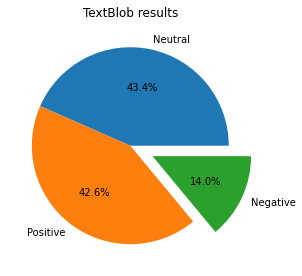

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

<h3> Based on pie chart above, it shows that there are 43.4% of the reviews are neutral, 42.6% of the reviews are positive, and 14.0% of the reviews are negative.